In [41]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import add_dummy_feature, PolynomialFeatures

from sklearn.linear_model import LinearRegression, SGDRegressor, LogisticRegression

from sklearn.model_selection import learning_curve, train_test_split


# datasets
from sklearn.datasets import load_iris

# Linear regression

In [2]:
np.random.seed(42)
m = 100
X = 2*np.random.rand(m,1)
y = 4+3 *X + np.random.randn(m, 1)

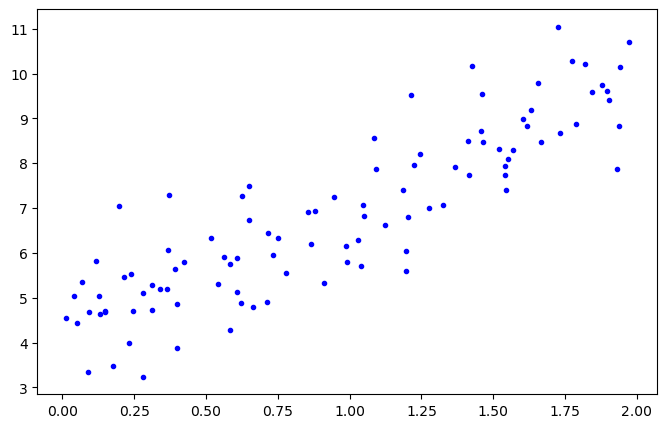

In [3]:
plt.figure(figsize=(8,5))
# plt.scatter(X,y)
plt.plot(X, y, "b.")
plt.show()

In [4]:
X.shape

(100, 1)

## using OLS by hand

In [5]:
# add 1 before
X_b = add_dummy_feature(X)
X_b[:2]

array([[1.        , 0.74908024],
       [1.        , 1.90142861]])

In [6]:
# use OLS method with formula
theta_best = np.linalg.inv(X_b.T@X_b)@X_b.T@y
theta_best

array([[4.21509616],
       [2.77011339]])

## using sklearn

In [7]:
lm = LinearRegression(fit_intercept=True, copy_X=True)

In [8]:
lm.fit(X,y)

LinearRegression()

In [9]:
lm.intercept_

array([4.21509616])

In [10]:
lm.coef_

array([[2.77011339]])

In [11]:
lm.rank_ # rank of X

1

In [12]:
lm.n_features_in_

1

## using SGDRegressor: 
with SGD Process

In [13]:
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-5, penalty=None, eta0=0.01, power_t=0.25,
 n_iter_no_change=100, random_state=42)

In [14]:
y.shape

(100, 1)

In [15]:
y.ravel()

array([ 6.33428778,  9.40527849,  8.48372443,  5.60438199,  4.71643995,
        5.29307969,  5.82639572,  8.67878666,  6.79819647,  7.74667842,
        5.03890908, 10.14821022,  8.46489564,  5.7873021 ,  5.18802735,
        6.06907205,  5.12340036,  6.82087644,  6.19956196,  4.28385989,
        7.96723765,  5.09801844,  5.75798135,  5.96358393,  5.32104916,
        8.29041045,  4.85532818,  6.28312936,  7.3932017 ,  4.68275333,
        9.53145501,  5.19772255,  4.64785995,  9.61886731,  7.87502098,
        8.82387021,  5.88791282,  7.0492748 ,  7.91303719,  6.9424623 ,
        4.69751764,  5.80238342,  5.34915394, 10.20785545,  6.34371184,
        7.06574625,  7.27306077,  5.71855706,  7.86711877,  7.29958236,
        8.82697144,  8.08449921,  9.73664501,  8.86548845,  6.03673644,
        9.59980838,  3.4686513 ,  5.64948961,  3.3519395 ,  7.50191639,
        5.54881045,  5.30603267,  9.78594227,  4.90965564,  5.91306699,
        8.56331925,  3.23806212,  8.99781574,  4.70718666, 10.70

In [16]:
sgd_reg.fit(X, y.ravel()) # y.ravel(), weil fit() 1-D-Ziele erwartet

SGDRegressor(n_iter_no_change=100, penalty=None, random_state=42, tol=1e-05)

In [17]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.21278812]), array([2.77270267]))

In [18]:
sgd_reg.n_iter_

366

# polynomial regression

In [19]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1)- 3
y =0.5* X** 2 + X + 2 + np.random.randn(m, 1)

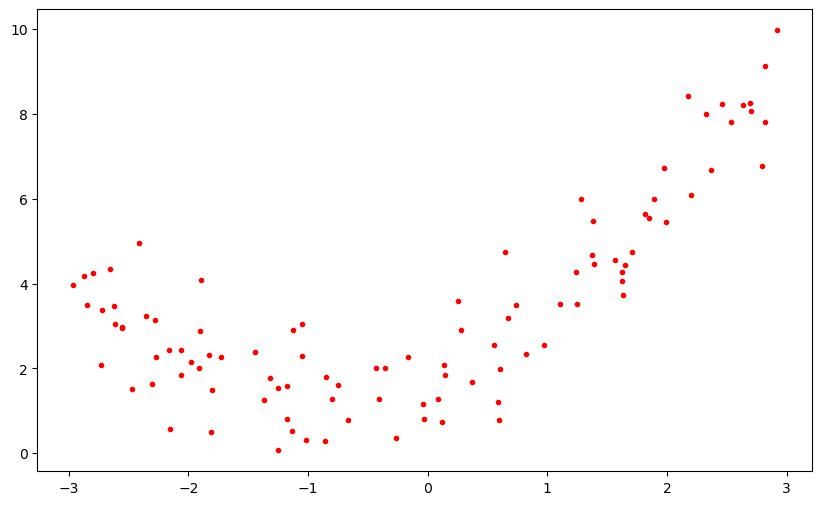

In [20]:
plt.figure(figsize=(10,6))
plt.plot(X,y,"r.")

In [21]:
poly_features = PolynomialFeatures(degree=2, include_bias=False) # only 2 necc parameters

In [22]:
X.shape

(100, 1)

In [23]:
X_poly = poly_features.fit_transform(X)
X_poly[0]

array([-0.75275929,  0.56664654])

In [24]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

LinearRegression()

In [25]:
lin_reg.intercept_, lin_reg.coef_

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

# Learning curve (nicht fertig)

In [26]:
np.linspace(0.01, 1.0, 40)

array([0.01      , 0.03538462, 0.06076923, 0.08615385, 0.11153846,
       0.13692308, 0.16230769, 0.18769231, 0.21307692, 0.23846154,
       0.26384615, 0.28923077, 0.31461538, 0.34      , 0.36538462,
       0.39076923, 0.41615385, 0.44153846, 0.46692308, 0.49230769,
       0.51769231, 0.54307692, 0.56846154, 0.59384615, 0.61923077,
       0.64461538, 0.67      , 0.69538462, 0.72076923, 0.74615385,
       0.77153846, 0.79692308, 0.82230769, 0.84769231, 0.87307692,
       0.89846154, 0.92384615, 0.94923077, 0.97461538, 1.        ])

In [27]:
np.linspace(1, 5, 3)

array([1., 3., 5.])

In [28]:
train_sizes, train_scores, valid_scores = learning_curve(
    LinearRegression(), X, y, train_sizes=np.linspace(0.01, 1.0, 40), cv=5,
    scoring="neg_root_mean_squared_error")
train_errors =-train_scores.mean(axis=1)
valid_errors =-valid_scores.mean(axis=1)

In [29]:
X.shape

(100, 1)

In [30]:
np.linspace(0.01, 1.0, 40)*100

array([  1.        ,   3.53846154,   6.07692308,   8.61538462,
        11.15384615,  13.69230769,  16.23076923,  18.76923077,
        21.30769231,  23.84615385,  26.38461538,  28.92307692,
        31.46153846,  34.        ,  36.53846154,  39.07692308,
        41.61538462,  44.15384615,  46.69230769,  49.23076923,
        51.76923077,  54.30769231,  56.84615385,  59.38461538,
        61.92307692,  64.46153846,  67.        ,  69.53846154,
        72.07692308,  74.61538462,  77.15384615,  79.69230769,
        82.23076923,  84.76923077,  87.30769231,  89.84615385,
        92.38461538,  94.92307692,  97.46153846, 100.        ])

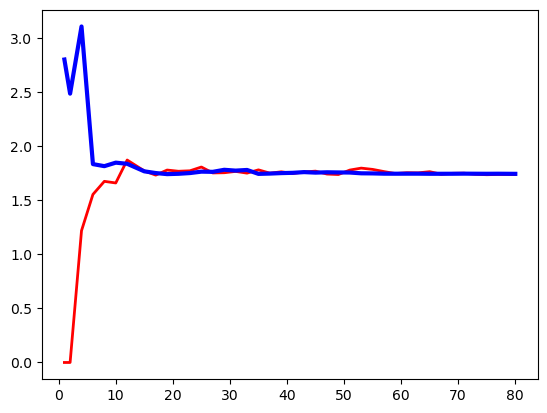

In [31]:
plt.plot(train_sizes, train_errors, "r-", linewidth=2, label="Trainingsdatensatz")
         
         
plt.plot(train_sizes, valid_errors, "b-", linewidth=3, label="Validierungsdatensatz")

         
plt.show()

# Logistic Regression

In [32]:
iris = load_iris(as_frame=True)
list(iris)

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [36]:
 iris.data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [38]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [45]:
# train test split
X = iris.data[["petal width (cm)"]]
y = iris.target_names[iris.target] == 'virginica'

In [46]:
iris.target_names[iris.target] == 'virginica'

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [49]:
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [50]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1) # Reshape für Spaltenvektor
y_proba = log_reg.predict_proba(X_new)

C:\Users\Binh_Hong_Ngoc\anaconda3\envs\Warclone\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [57]:
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0, 0]
decision_boundary

1.6516516516516517

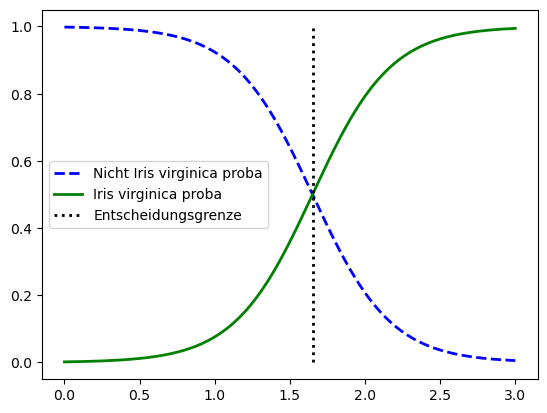

In [59]:
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2,
label="Nicht Iris virginica proba")
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica proba")
plt.plot([decision_boundary, decision_boundary], [0, 1], "k:", linewidth=2,
label="Entscheidungsgrenze")
plt.legend()
plt.show()

In [65]:
list(iris)

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [67]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [68]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [69]:
# 3 categories
X = iris.data[["petal length (cm)", "petal width (cm)"]]
y = iris["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [71]:
softmax_reg = LogisticRegression(penalty='l2', tol=0.0001, max_iter=100, C=30, multi_class='auto', 
                                 solver='lbfgs', random_state=42)
softmax_reg.fit(X_train, y_train)

LogisticRegression(C=30, random_state=42)

In [72]:
# test some predictions
softmax_reg.predict([[5, 2]])

C:\Users\Binh_Hong_Ngoc\anaconda3\envs\Warclone\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([2])

In [73]:
softmax_reg.predict_proba([[5, 2]]).round(2)

C:\Users\Binh_Hong_Ngoc\anaconda3\envs\Warclone\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([[0.  , 0.04, 0.96]])